                                    Portfolio Optimisation
                                            Group-9
                                        
                                        Safwan Ahmed
                                        
                                        Sadman Sakib Ifty
                                        
                                        Md. Ashiqur Rahaman
                                    

In [1]:
""" A portfolio optimisation project of a selected number of companies. We conducted correlation and covariance 
matrices. A histogram is used to portray daily logarithmic returns. A sensitivity analysis was also carried to find
the sensitivity of the S&P500 index to the movements of Apple's share price. """

import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as wb
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline 

from scipy import stats
from scipy.stats import pearsonr

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

In [2]:
#Research time period of 10 years from 2009 to 2018

start = pd.to_datetime('2009-01-01')
end = pd.to_datetime('2018-12-31')                           

In [3]:
"""Importing the closing prices of the randomly selected stocks from Tech, Financial Services and Retail sectors 
and the S&P500 index """

stocks = ['Apple','Microsoft','Netflix','Walmart','CostCo','Macys', 'Goldman Sachs','JP Morgan Chase','Bank of America']

apple = wb.DataReader('AAPL', data_source = 'yahoo', start = start, end = end)['Adj Close']
microsoft = wb.DataReader('MSFT', data_source = 'yahoo', start = start, end = end)['Adj Close']
netflix = wb.DataReader('NFLX', data_source = 'yahoo', start = start, end = end)['Adj Close']
walmart = wb.DataReader('WMT', data_source = 'yahoo', start = start, end = end)['Adj Close']
costco = wb.DataReader('COST', data_source = 'yahoo', start = start, end = end)['Adj Close']
macy = wb.DataReader('M', data_source = 'yahoo', start = start, end = end)['Adj Close']
goldman = wb.DataReader('GS', data_source = 'yahoo', start = start, end = end)['Adj Close']
bank_of_america = wb.DataReader('BAC', data_source = 'yahoo', start = start, end = end)['Adj Close']
jp_morgan = wb.DataReader('JPM', data_source = 'yahoo', start = start, end = end)['Adj Close']

SP500 = wb.DataReader('^GSPC', data_source = 'yahoo', start = start, end = end)['Adj Close']


In [4]:
##Rounding off the closing share prices to 2 decimal places and assigning proper headings for further analysis

closing_price = round(pd.concat([apple, microsoft, netflix, walmart, costco, macy, goldman, bank_of_america, jp_morgan], axis = 1),2)
closing_price.columns = ['Apple', 'Microsoft','Netflix','Walmart','Costco','Macy','Goldman Sachs','Bank of America','JP Morgan'] 

In [5]:
closing_price.iloc[0]

Apple               2.80
Microsoft          15.47
Netflix             4.27
Walmart            42.72
Costco             39.45
Macy                7.43
Goldman Sachs      72.84
Bank of America    12.48
JP Morgan          23.52
Name: 2009-01-02 00:00:00, dtype: float64

In [6]:
#Forming a columnar format of the index figures with SP500  
index_value = round(pd.concat([SP500], axis = 1),2)
index_value.columns = ['SP500'] 
index_value

,SP500
Date,
2009-01-02,931.80
2009-01-05,927.45
2009-01-06,934.70
2009-01-07,906.65
2009-01-08,909.73
...,...
2018-12-24,2351.10
2018-12-26,2467.70
2018-12-27,2488.83


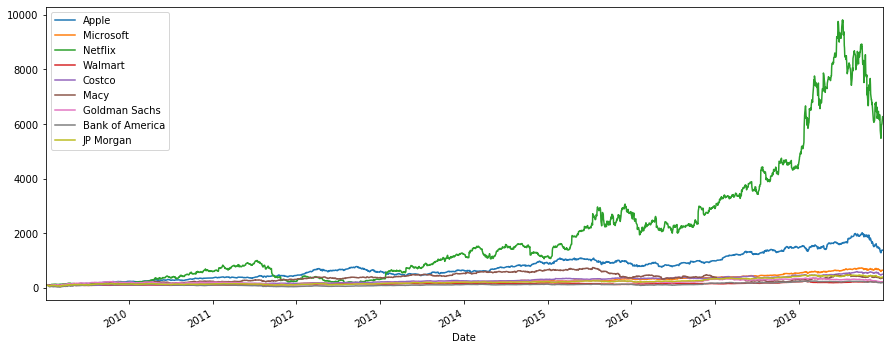

In [7]:
#Normalising the share prices to 100 to show the increase in share value over the 10 year period. 
#Normalising helps us to put the price into perspective with other companies

(closing_price/closing_price.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

In [8]:
closing_price.head()

,Apple,Microsoft,Netflix,Walmart,Costco,Macy,Goldman Sachs,Bank of America,JP Morgan
Date,,,,,,,,,
2009-01-02,2.80,15.47,4.27,42.72,39.45,7.43,72.84,12.48,23.52
2009-01-05,2.91,15.62,4.56,42.23,38.67,7.89,74.54,12.18,21.94
2009-01-06,2.87,15.80,4.71,41.85,38.04,7.91,74.48,12.44,22.41
2009-01-07,2.80,14.85,4.67,41.50,37.06,7.65,70.95,11.94,21.07
2009-01-08,2.86,15.31,4.74,38.39,37.45,7.39,71.71,11.79,20.42


In [9]:
closing_price.tail()

,Apple,Microsoft,Netflix,Walmart,Costco,Macy,Goldman Sachs,Bank of America,JP Morgan
Date,,,,,,,,,
2018-12-24,35.85,91.79,233.88,82.74,181.80,24.96,149.59,21.64,86.22
2018-12-26,38.38,98.06,253.67,87.16,190.06,26.72,155.88,22.96,89.79
2018-12-27,38.13,98.66,255.57,88.30,192.41,26.64,158.26,23.21,90.80
2018-12-28,38.15,97.89,256.08,88.82,193.33,26.62,155.98,23.22,90.61
2018-12-31,38.52,99.04,267.66,89.80,194.92,26.41,159.83,23.46,91.35


In [10]:
#Finding the correlation between the selected stocks
closing_price.pct_change(1).corr()

,Apple,Microsoft,Netflix,Walmart,Costco,Macy,Goldman Sachs,Bank of America,JP Morgan
Apple,1.000000,0.437292,0.215890,0.230422,0.335260,0.290435,0.425459,0.350801,0.399587
Microsoft,0.437292,1.000000,0.253338,0.275902,0.408497,0.310572,0.458403,0.382075,0.455306
Netflix,0.215890,0.253338,1.000000,0.118727,0.178023,0.161012,0.216653,0.163217,0.172459
Walmart,0.230422,0.275902,0.118727,1.000000,0.488296,0.290688,0.246709,0.188291,0.252748
Costco,0.335260,0.408497,0.178023,0.488296,1.000000,0.410495,0.374396,0.311085,0.384128
Macy,0.290435,0.310572,0.161012,0.290688,0.410495,1.000000,0.408437,0.403188,0.428445
Goldman Sachs,0.425459,0.458403,0.216653,0.246709,0.374396,0.408437,1.000000,0.701834,0.805433
Bank of America,0.350801,0.382075,0.163217,0.188291,0.311085,0.403188,0.701834,1.000000,0.810833
JP Morgan,0.399587,0.455306,0.172459,0.252748,0.384128,0.428445,0.805433,0.810833,1.000000


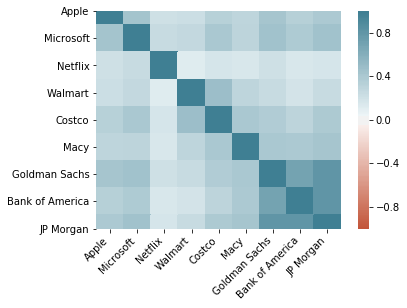

In [11]:
#Plotting a heatmap of the correlation matrix among the selected stocks to visually illustrate the strength of the correlation

corr = closing_price.pct_change(1).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n= 300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
#Finding the logarithmic returns of the closing prices of the stocks. 
#The logarithmic return method to calculate the daily returns is a accurate representation of daily returns.

log_ret = np.log(closing_price / closing_price.shift(1))
log_ret.head()

,Apple,Microsoft,Netflix,Walmart,Costco,Macy,Goldman Sachs,Bank of America,JP Morgan
Date,,,,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.038534,0.009649,0.065709,-0.011536,-0.019970,0.060070,0.023071,-0.024332,-0.069540
2009-01-06,-0.013841,0.011458,0.032365,-0.009039,-0.016426,0.002532,-0.000805,0.021122,0.021196
2009-01-07,-0.024693,-0.062010,-0.008529,-0.008398,-0.026100,-0.033422,-0.048555,-0.041023,-0.061657
2009-01-08,0.021202,0.030506,0.014878,-0.077896,0.010468,-0.034578,0.010655,-0.012642,-0.031335


In [13]:
#Average annual return over the 10-year time frame 
annual_ret  = log_ret.mean() * 252 * 100
annual_ret = round(pd.concat([annual_ret], axis = 1),2)
annual_ret.columns = ['Annual Return (%)'] 
annual_ret

,Annual Return (%)
Apple,26.27
Microsoft,18.60
Netflix,41.46
Walmart,7.44
Costco,16.01
Macy,12.71
Goldman Sachs,7.87
Bank of America,6.32
JP Morgan,13.60


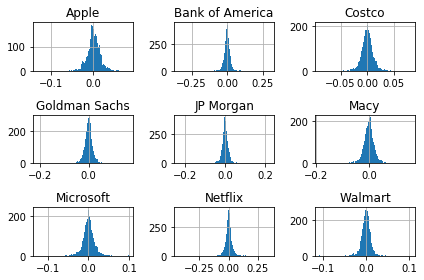

In [14]:
#presenting the daily returns in a histogram
log_ret.hist(bins = 100)
plt.tight_layout()

In [15]:
#A random number generator with a seed of 105 is used to generate weights, which are the allocations of stock portfolios
#The weights have been normalized so that the total is equal to 1.
#The portfolio of stocks with the highest Sharpe Ratio is the best allocation possible.

np.random.seed(105)

portfolio = 50000
all_weights = np.zeros((portfolio, len(closing_price.columns) ))
ret_arr = np.zeros(portfolio)
vol_arr = np.zeros(portfolio)
sharp_arr = np.zeros(portfolio)

for ind in range(portfolio):


    weights = np.array(np.random.random(9)) 
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights
    
    exp_ret = np.sum((log_ret.mean() * weights) * 252)
    ret_arr[ind] = exp_ret
    
    exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    vol_arr[ind] = exp_vol

"""The Sharpe Ratio is used as a metric to evaluate the lucrativeness of the portfolio.
The Sharpe Ratio is the ratio of the expected returns to the expected volatility and quantifies the maximum return 
an investor can expect for a given risk. The higher the Sharpe Ratio the better."""
    
    SR = ret_arr[ind] / vol_arr[ind]
    sharp_arr[ind] = SR  
    

In [16]:
#Finding the best combination of stocks which means the maximum value for the Sharpe ratio

sharp_arr.argmax()

max_vol = vol_arr[sharp_arr.argmax()]
max_ret = ret_arr[sharp_arr.argmax()]
best_weights = all_weights[sharp_arr.argmax(), :]

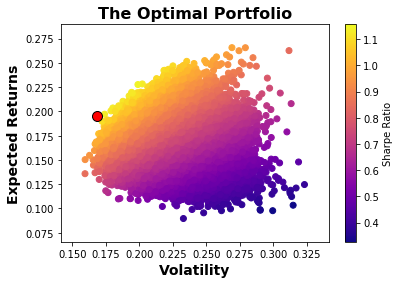

In [17]:
#plotting the Markowitz efficient frontier

plt.scatter(x = vol_arr, y = ret_arr, c = sharp_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontsize = 14, weight = 'bold')
plt.ylabel('Expected Returns', fontsize = 14, weight = 'bold')
plt.title('The Optimal Portfolio', fontsize = 16, weight = 'bold')

#Finding the portfolio with the best sharpe ratio
plt.scatter(max_vol, max_ret, c = 'red', s = 100, edgecolors = 'black')

In [18]:
print('FINAL RECOMMENDATION \n')

for i in range(0, len(stocks)):
    print('The most optimal allocation would be', round(best_weights[i] * 100,2), '% to', stocks[i])

FINAL RECOMMENDATION 

The most optimal allocation would be 24.64 % to Apple
The most optimal allocation would be 8.92 % to Microsoft
The most optimal allocation would be 11.69 % to Netflix
The most optimal allocation would be 24.09 % to Walmart
The most optimal allocation would be 26.42 % to CostCo
The most optimal allocation would be 2.11 % to Macys
The most optimal allocation would be 0.27 % to Goldman Sachs
The most optimal allocation would be 0.51 % to JP Morgan Chase
The most optimal allocation would be 1.35 % to Bank of America


In [19]:
#Individual returns in the portfolio 
port_ret =  (log_ret * best_weights) * 100

#Annualising the individual returns in the portfolio by multiplying by approximately 252 working days
port_ret = port_ret.mean() * 252  
port_ret = round(pd.concat([port_ret], axis = 1),4)
port_ret.columns = ['Individual Returns in Portfolio (%)'] 
port_ret

,Individual Returns in Portfolio (%)
Apple,6.4717
Microsoft,1.6588
Netflix,4.8476
Walmart,1.7929
Costco,4.2299
Macy,0.2680
Goldman Sachs,0.0210
Bank of America,0.0326
JP Morgan,0.1841


# Regression Analysis

In [20]:
x = closing_price
y = SP500

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = regressor.predict(x_test)

In [24]:
intercept = regressor.intercept_
intercept

298.72620339282435

In [25]:
#R-Square value indicates how well the independent variables exaplain the variation in the dependent variable.  
R_squared = r2_score(y_test, y_pred)
R_squared

0.9870928285731019

A 98% R-squared value indicates that the independent variables such as Apple, Microsoft prices explain 98% of the variation in the S&P 500 index prices. The high value indicates that our model is reliable and that the selected stocks explain the fluctuation in the SP500 index value.  

In [26]:
x2 = sm.add_constant(x)

model = sm.OLS(y, x2)

/Users/Safwan/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
est = model.fit()

In [28]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.214e+04
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:44:18   Log-Likelihood:                -13994.
No. Observations:                2516   AIC:                         2.801e+04
Df Residuals:                    2506   BIC:                         2.807e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             300.9365     10.982     

In [29]:
from sympy import *
xA, xM, xN, xW, xC, xM, xGS, xBOA, xJP = symbols('xA xM xN xW xC xM xGS xBOA xJP') 
xA, xM, xN, xW, xC, xM, xGS, xBOA, xJP

(xA, xM, xN, xW, xC, xM, xGS, xBOA, xJP)

In [30]:
#Forming a multivariate equation using SP500 as the dependent variable and the 9 selected stocks as the independent variable.

y_sp = 297 + xA*1.05 + xM*0.58 - xN*0.99 + xW*1.44 + xC*4.15 + xM*5.56 + xGS*1.45 + xBOA*13.16 + xJP*13.63

In [31]:
y_sp

1.05*xA + 13.16*xBOA + 4.15*xC + 1.45*xGS + 13.63*xJP + 6.14*xM - 0.99*xN + 1.44*xW + 297

# Finding the sensitivity of the SP500 index value against the movement of the share price of Apple. We only find the sensitivity of index to Apple's share price as it has the highest market capitalisation among the other shares.

In [32]:
#Differentiating Y(SP500) with respect to Apple

dyda = diff(y_sp, xA)
dyda

1.05000000000000

In [33]:
#Mean Apple and SP500 index value over the 10 year period

AppleMeanPrice = closing_price.Apple.mean()
SP500MeanPrice = index_value.SP500.mean()
display(AppleMeanPrice)
display(SP500MeanPrice)

21.106347376788573

1765.7654054054046

In [34]:
#Sensitivity of S&P500 against Apple
SenApple = dyda * (AppleMeanPrice / SP500MeanPrice)
SenApple

0.0125507412693590

# A 1% increase in Apple's share price will lead to a 0.051% increase in the S&P500 index value